In [1]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
import pylab as pl   #画图用
from sklearn import svm
from sklearn import linear_model

In [2]:
data = pd.read_excel('E:/vcdata/vcdata(91-17-new).xlsx')
# data2 = pd.read_csv('E:/vcdata/VCintroductions.csv')
dataVC = pd.read_excel('E:/vcdata/vcAmountaandTimes(91-17).xlsx')

In [3]:
data2 = pd.read_excel('E:/vcdata/VCintroductions.xlsx')

In [4]:
def getstr(s): ### 投资时间统一为yyyy
    return str(s)[:4]##
data['year'] = data['投资时间'].map(getstr)

In [5]:
# year = [str(i+1991) for i in range(13)]
# data3 = data[data['year'].isin(year) ]
# a = data3['机构名称'].drop_duplicates().values
# b = data2['机构简称'].drop_duplicates().values
# c = list(set(a).difference(set(b)))
# df = pd.DataFrame(c,columns=['机构简称'])
# # df.to_e

In [6]:
# df.to_excel('E:/vcdata/未知机构.xlsx')

In [7]:
# len(set(b).difference(set(a)))

In [8]:
year = [str(i+1991) for i in range(13)]
data3 = data[data['year'].isin(year) ]
institutions_type=data2.set_index("机构简称").to_dict()['资本类型']
def d1(s):
    end=institutions_type[s]
    return(end)
data3['资本类型']=data3['机构名称'].map(d1)

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [9]:
data_foreign = data3[data3['资本类型'] == '外资']
data_jioint = data3[data3['资本类型'] == '合资']
data_locl = data3[data3['资本类型'] == '本土']

In [10]:
data3['资本类型'].drop_duplicates().values

array(['合资', '本土', '外资'], dtype=object)

In [11]:
cityvc = data.groupby('year')
for cc in cityvc:
    if cc[0] == '1991':
        print(1)

1


In [12]:
def getAmountTimes(data):
    cityvc = data.groupby('year')
    yearsL = [str(yy) for yy in range(1991,2018)]
    Ytimes= [np.NaN]*len(yearsL)
    Amount = [np.NaN]*len(yearsL)
    for cc in cityvc:
        times = 0
        index = 0 ###标识是否存在
        amount = 0
        for i in range(cc[1].shape[0]):
            times += 1
            if cc[1].iloc[i:i+1,40:41].values[0][0]!= '--':

                index = 1
                amount += cc[1].iloc[i:i+1,40:41].values[0][0]
#         Ytimes.append(times)
        
        if index == 1:        
            amount = amount
        else:
            amount = 0
#             Amount.append(0)
        Amount[yearsL.index(cc[0])] = amount
        Ytimes[yearsL.index(cc[0])] = times
            
    return(Amount,Ytimes)

In [13]:
foreign = getAmountTimes(data_foreign)
jioint = getAmountTimes(data_jioint)
locl = getAmountTimes(data_locl)

In [14]:
len(foreign)

2

In [15]:
len(foreign[1])

27

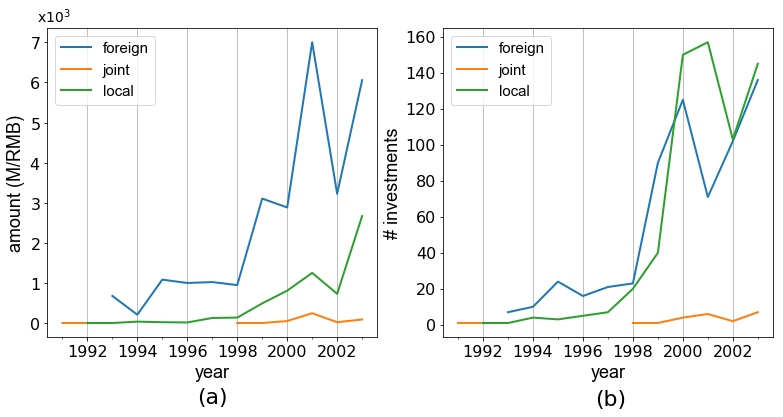

In [28]:
from matplotlib.ticker import FuncFormatter   ### 今天的主角
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size' : 18,
}###设置横纵坐标的字体格式
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size' : 15,
}###设置横纵坐标的字体格式
yearsL = np.arange(1991,2018)
fig = plt.figure(figsize=(13,12.5))
ax1 = fig.add_subplot(221)
xmajorLocator = MultipleLocator(2)
xminorLocator = MultipleLocator(1.0)
plt.tick_params(labelsize=16) #刻度字体大小13 
# plt.xticks(rotation=45)
def formatnum2(x, pos):
    return '$%.0f$' % (x/1000)
# formatter = FuncFormatter(formatnum)
formatter2 = FuncFormatter(formatnum2)
ax1.yaxis.set_major_formatter(formatter2)
ax1.plot(yearsL,foreign[0],linewidth=2,label = 'foreign')
ax1.plot(yearsL,jioint[0],linewidth=2,label = 'joint')
ax1.plot(yearsL,locl[0],linewidth=2,label = 'local')

ax1.set_xlabel('year',font2)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
ax1.yaxis.set_major_formatter(formatter2)
ax1.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度
plt.text(1990, 7500, r'x$10^{3}$',size=14)
ax1.set_xlabel('year',font2)
ax1.set_ylabel('amount (M/RMB)',font2)
# plt.text(1991-2,7500,'(a)',fontsize=22)
plt.text(1996.4,-2000,'(a)',fontsize=22)
plt.legend(prop = font1)

ax2 = fig.add_subplot(222)
xmajorLocator = MultipleLocator(2)
xminorLocator = MultipleLocator(1.0)
plt.tick_params(labelsize=16) #刻度字体大小13 
# def formatnum(x, pos):
#     return '$%.0f$' % (x/1000)
# formatter = FuncFormatter(formatnum)
# formatter2 = FuncFormatter(formatnum2)
# ax1.yaxis.set_major_formatter(formatter2)
ax2.plot(yearsL,foreign[1],linewidth=2,label = 'foreign')
ax2.plot(yearsL,jioint[1],linewidth=2,label = 'joint')
ax2.plot(yearsL,locl[1],linewidth=2,label = 'local')
ax2.xaxis.set_major_locator(xmajorLocator)
ax2.xaxis.set_minor_locator(xminorLocator)
ax2.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度
ax2.set_xlabel('year',font2)
ax2.set_ylabel('# investments',font2)
plt.text(1996.5,-45,'(b)',fontsize=22)
plt.legend(prop = font1)
# plt.savefig('E:/vcdata/pic/picSC/0Fig_sup(amount_times).pdf',bbox_inches='tight')
plt.savefig('E:/0论文/2picture/2_2.png',dpi=500, bbox_inches='tight')
plt.show()

D:\Users\lu\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


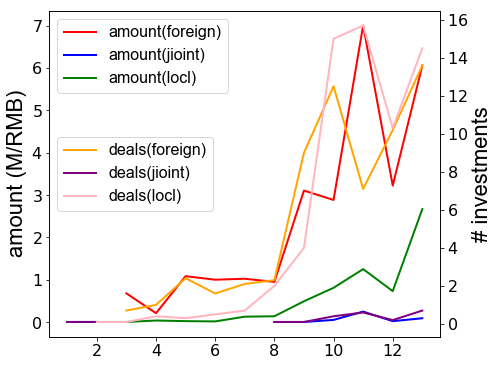

In [20]:
colors = ['red','blue','green','orange','purple','lightpink'] 
from matplotlib.ticker import FuncFormatter   ### 今天的主角
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size' : 22,
}###设置横纵坐标的字体格式
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size' : 16,
}###设置横纵坐标的字体格式

############## 用科学计数法表示坐标 ################
fig = plt.figure(figsize=(7,6))
plt.tick_params(labelsize=16) #刻度字体大小13
 
ax1 = fig.add_subplot(111)
ax1.plot(np.arange(1,len(foreign[0])+1),foreign[0],linewidth=2,color=colors[0],label = 'amount(foreign)')
ax1.plot(np.arange(1,len(jioint[0])+1),jioint[0],linewidth=2,color=colors[1],label = 'amount(jioint)')
ax1.plot(np.arange(1,len(locl[0])+1),locl[0],linewidth=2,color=colors[2],label = 'amount(locl)')
ax1.set_ylabel('amount (M/RMB)',font2)
ax1.yaxis.set_tick_params(color='black',colors='black',labelsize=16)
def formatnum(x, pos):
    return '$%.0f$' % (x/1000)
formatter = FuncFormatter(formatnum)
def formatnum2(x, pos):
    return '$%.0f$' % (x/10)
formatter2 = FuncFormatter(formatnum2)
ax1.yaxis.set_major_formatter(formatter)
ax1.legend(loc='best',prop=font1) 
ax2 = ax1.twinx()  # this is the important function
ax2.plot(np.arange(1,len(foreign[0])+1),foreign[1],linewidth=2,color=colors[3],label = 'deals(foreign)')
ax2.plot(np.arange(1,len(jioint[0])+1),jioint[1],linewidth=2,color=colors[4],label = 'deals(jioint)')
ax2.plot(np.arange(1,len(locl[0])+1),locl[1],linewidth=2,color=colors[5],label = 'deals(locl)')
ax2.set_ylabel('# investments',font2)
ax2.spines['left'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.yaxis.set_tick_params(color='black',colors='black',labelsize=16)
ax2.yaxis.set_major_formatter(formatter2)
ax1.legend(loc='best',prop=font1) 
ax2.legend(loc='center left',prop=font1)
# plt.savefig('E:/vcdata/pic/picSC/0Fig_sup(amount_times).pdf',bbox_inches='tight')
plt.show()

In [ ]:
######